# movie of the fourier series for the lecture 11 in motion

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
from axes import axes

# retina distplay
%matplotlib inline
# hidpi display
plt.rcParams['figure.dpi'] = 300
# turn on grid by default
plt.rcParams['axes.grid'] = True


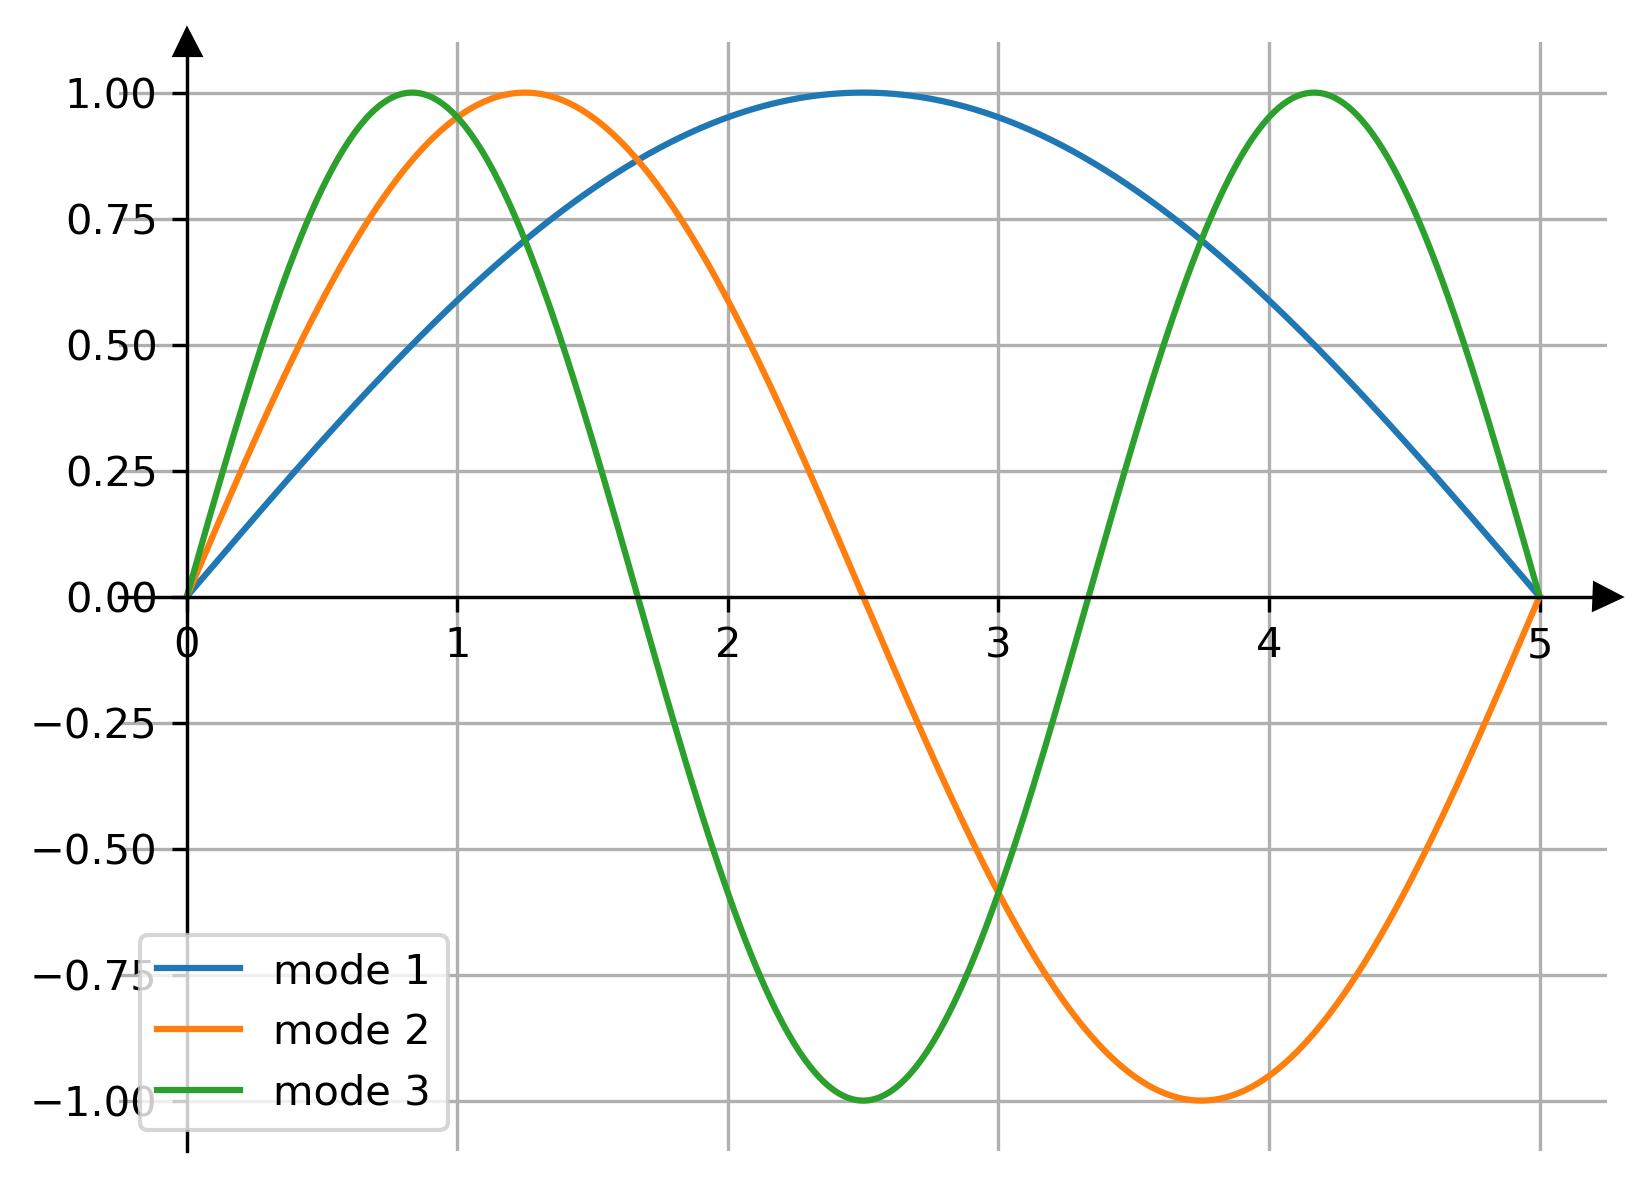

In [4]:
# firs three modes for waves on a string, at t=0
xmax = 5
modes = [1,2,3]
ks = [2 * math.pi / (xmax/(m/2)) for m in modes]
x = np.linspace(0, xmax, 500)
ys = [np.sin(k*x) for k in ks]
plt.plot(x, ys[0], label='mode 1')
plt.plot(x, ys[1], label='mode 2')
plt.plot(x, ys[2], label='mode 3')
axes()
plt.legend()
plt.savefig('lec12_1.png')

In [5]:
## fourier transform of a plucked string, from Georgi
xvals = np.linspace(0, 1, 1000)

def target(xvals:np.ndarray) -> np.ndarray:
    """
    target function for fourier transform of plucked string
    """
    yvals = np.zeros_like(xvals)
    w = 0.75
    yvals[xvals < w] = xvals[xvals<w]
    yvals[xvals >= w] = w*(1-xvals[xvals>=w])/(1-w)
    return yvals


(-0.2, 0.8)

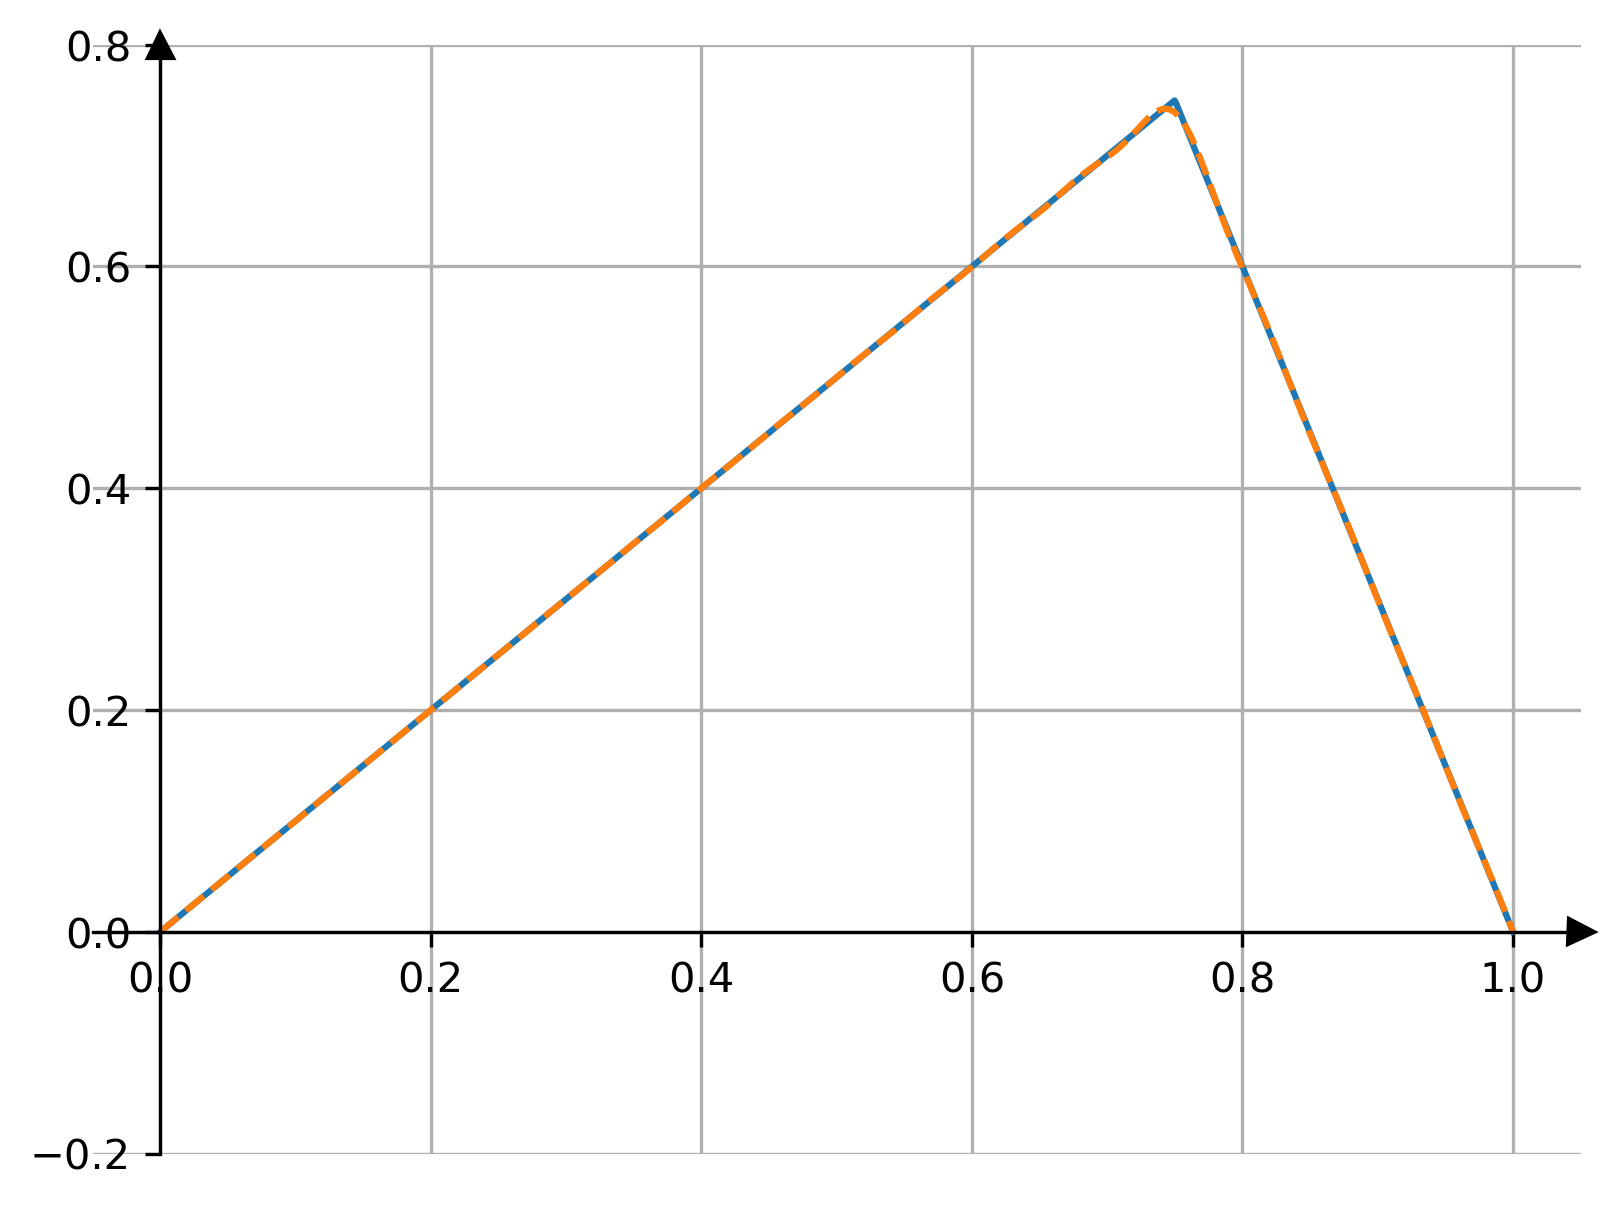

In [6]:
n = np.arange(1, 36)

w=0.75
l=1.0
cn = 2*np.sin(n*np.pi*w)/((1-w)*n*n*np.pi*np.pi)
#print(cn)

# target function at t=0
plt.plot(xvals, target(xvals))


psi = np.zeros_like(xvals)
contribs = np.zeros_like(n)
for nval in n:
    contrib = cn[nval-1] * np.sin(nval*np.pi*xvals/(l))
    psi += contrib

axes()
plt.plot(xvals, psi, '--', label=f'Sum to n={np.max(n)}')
plt.ylim(-0.2, 0.8)


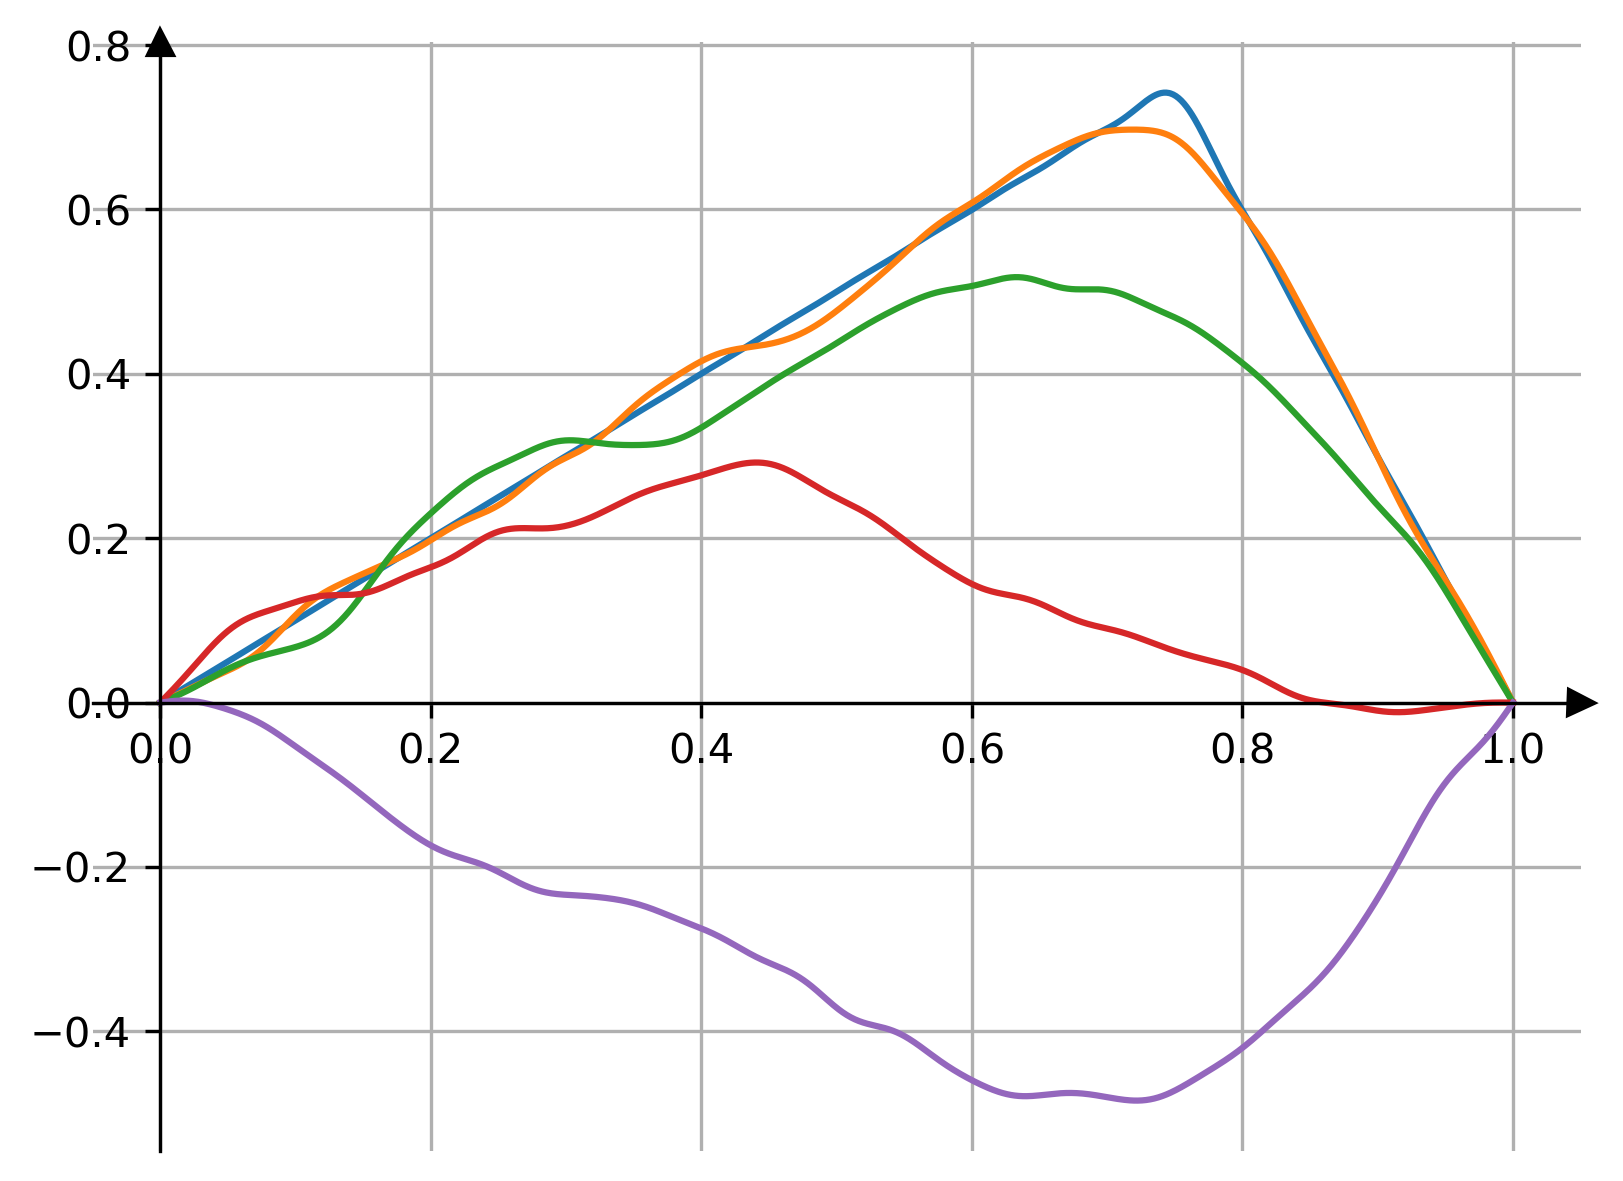

In [7]:
# now animate the signal
T = 1
rho = 1
def y(t: float) -> np.ndarray:
    t = t/100.
    y = np.zeros_like(xvals)
    contribs = np.zeros_like(n)
    #plt.plot(xvals, target(xvals))
    for nval in n:
        omega = 2 *math.sqrt(T/(rho*l*l) ) * (nval * np.pi - nval**3/6) # non-dispersive
        #omega = 2 *math.sqrt(T/(rho*l*l) ) * (nval * np.pi) # dispersive
        contrib = cn[nval-1] * np.sin(nval*np.pi*xvals/(l))*np.cos(omega * t)
        y += contrib
    return y

def y3(t: float) -> list:
    t = t/100.
    y = np.zeros_like(xvals)
    y1 = np.zeros_like(xvals)
    y2 = np.zeros_like(xvals)
    contribs = np.zeros_like(n)
    #plt.plot(xvals, target(xvals))
    for nval in n:
        #omega = 2 *math.sqrt(T/(rho*l*l) ) * (nval * np.pi - nval**3/6) # dispersive
        omega = 2 *math.sqrt(T/(rho*l*l) ) * (nval * np.pi) # non-dispersive
        contrib = cn[nval-1] * np.sin(nval*np.pi*xvals/(l))*np.cos(omega * t)
        if nval == 1:
            y1 = contrib
        elif nval == 2:
            y2 = contrib
        y += contrib
    return [y, y1, y2]


plt.plot(xvals, y(0))
plt.plot(xvals, y(2))
plt.plot(xvals, y(10))
plt.plot(xvals, y(20))
plt.plot(xvals, y(40))
axes()


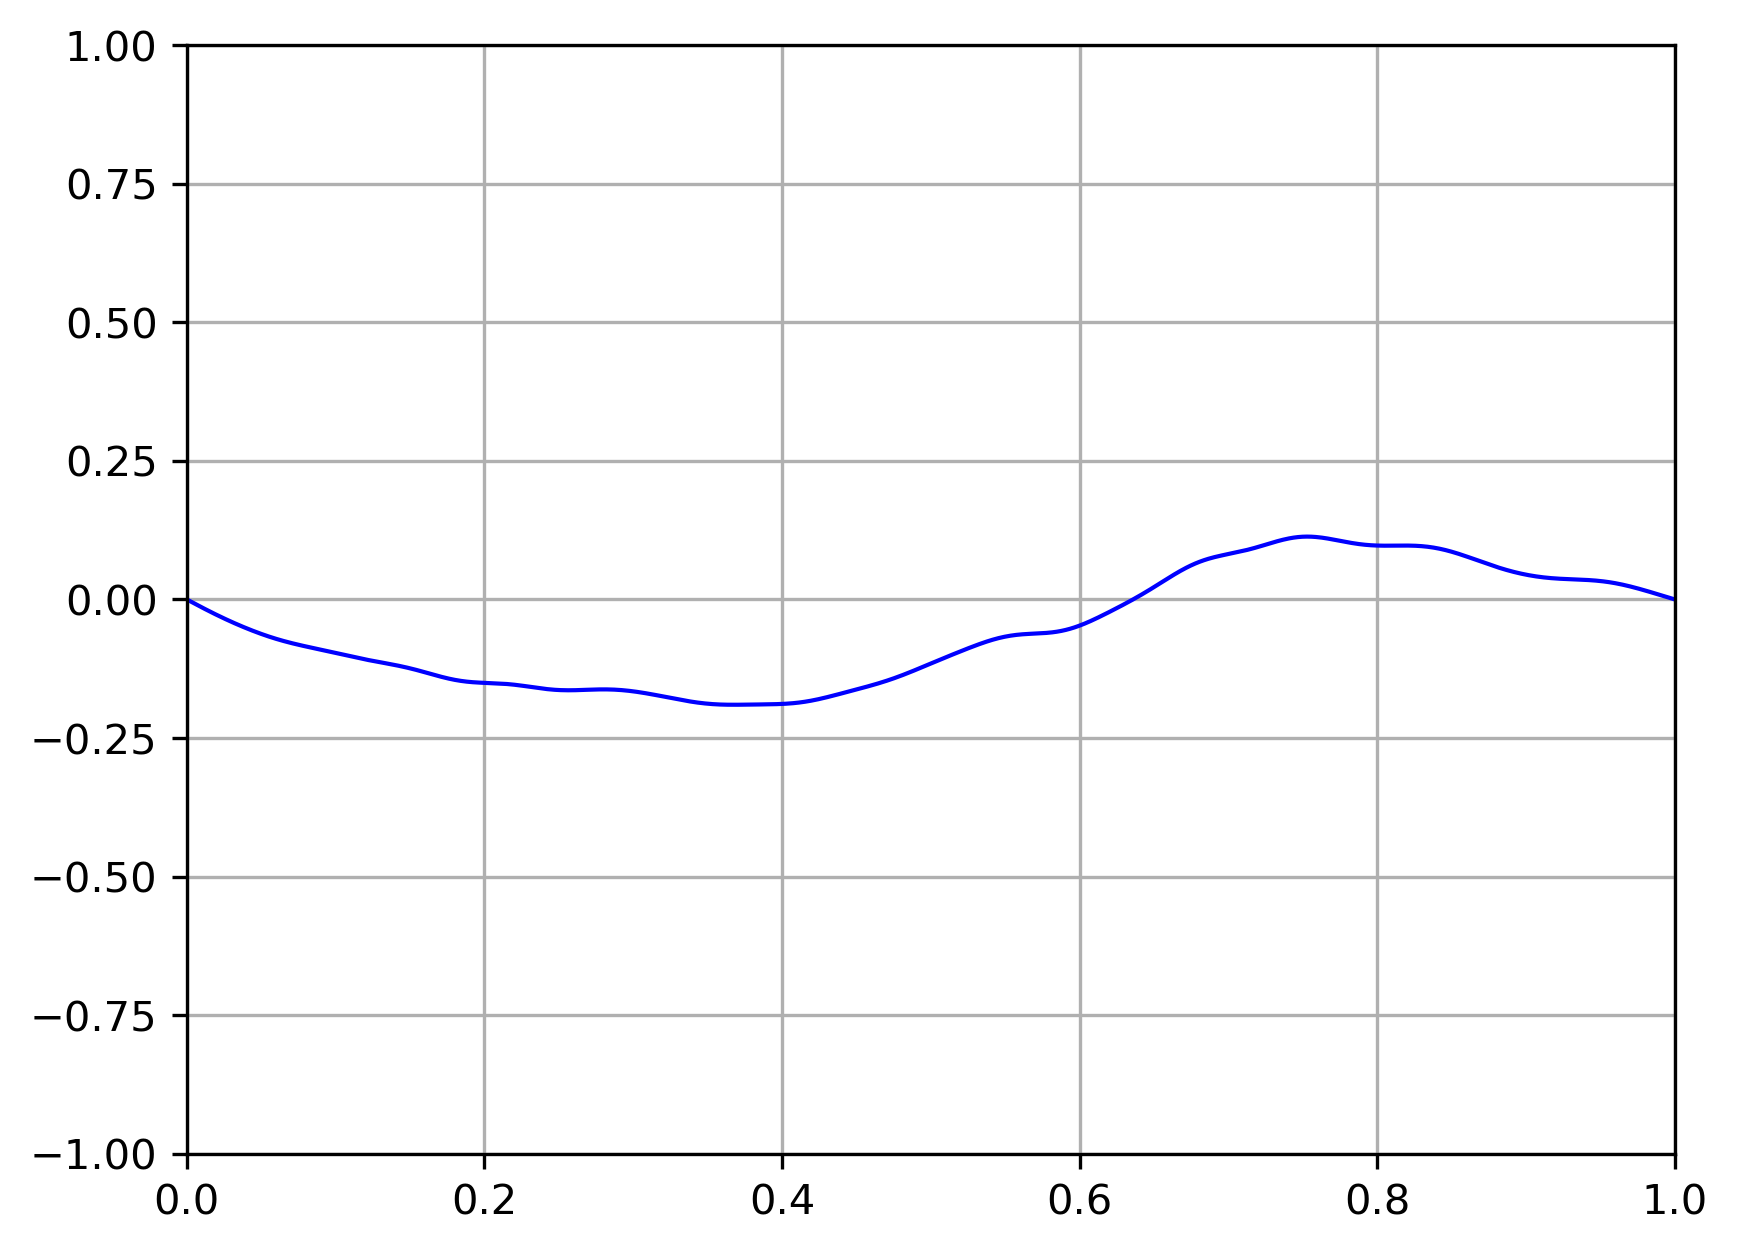

In [8]:
# initializing a line variable
# initializing a figure in
# which the graph will be plotted
fig = plt.figure()
# marking the x-axis and y-axis
axis = plt.axes(xlim=(0, l),
                ylim=(-1,1))

line, = axis.plot([], [], 'b-', lw=1)


def plotter_sq(t: int) -> np.ndarray:
    yvals = np.zeros(xvals.shape)
    yvals = y(t)
    line.set_data(xvals, yvals)
    return line,

# data which the line will
# contain (x, y)


def init():
    line.set_data([], [])
    return line,


anim = FuncAnimation(fig, plotter_sq, init_func=init,
                     frames=500, interval=5, blit=True)


anim.save('test_pluck_disp.mp4',
          writer='ffmpeg', fps=24, dpi=100)


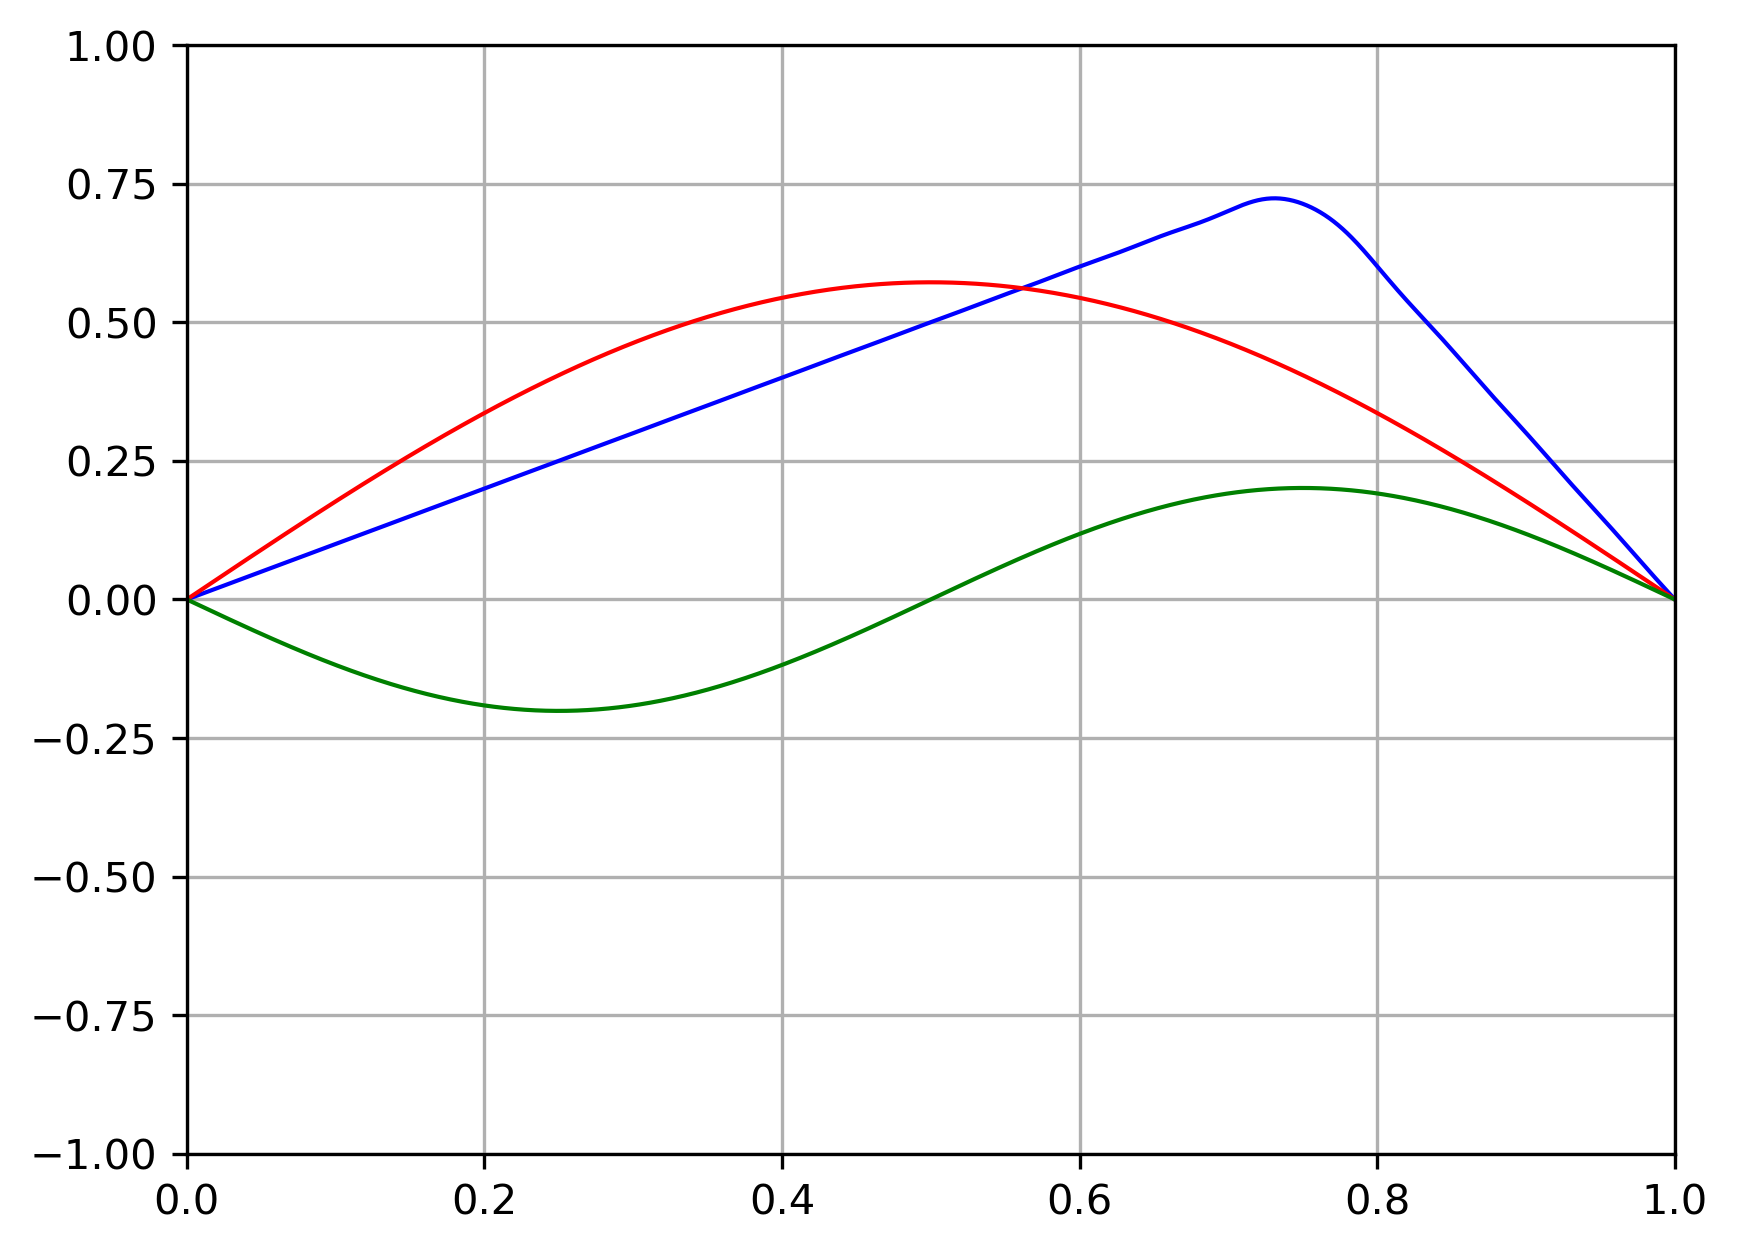

In [9]:
### now plot three of them
# initializing a line variable
# initializing a figure in
# which the graph will be plotted
fig = plt.figure()
# marking the x-axis and y-axis
axis = plt.axes(xlim=(0, l),
                ylim=(-1,1))

line, = axis.plot([], [], 'b-', lw=1)
line1, = axis.plot([], [], 'r-', lw=1)
line2, = axis.plot([], [], 'g-', lw=1)


def plotter3_sq(t: int) -> np.ndarray:
    [y, y1, y2 ] = y3(t)
    line.set_data(xvals, y)
    line1.set_data(xvals, y1)
    line2.set_data(xvals, y2)
    return [line, line1, line2]

# data which the line will
# contain (x, y)


def init3():
    line.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return line,


anim = FuncAnimation(fig, plotter3_sq, init_func=init3,
                     frames=500, interval=5, blit=True)


anim.save('test_pluck_nodisp3.mp4',
          writer='ffmpeg', fps=24, dpi=100)


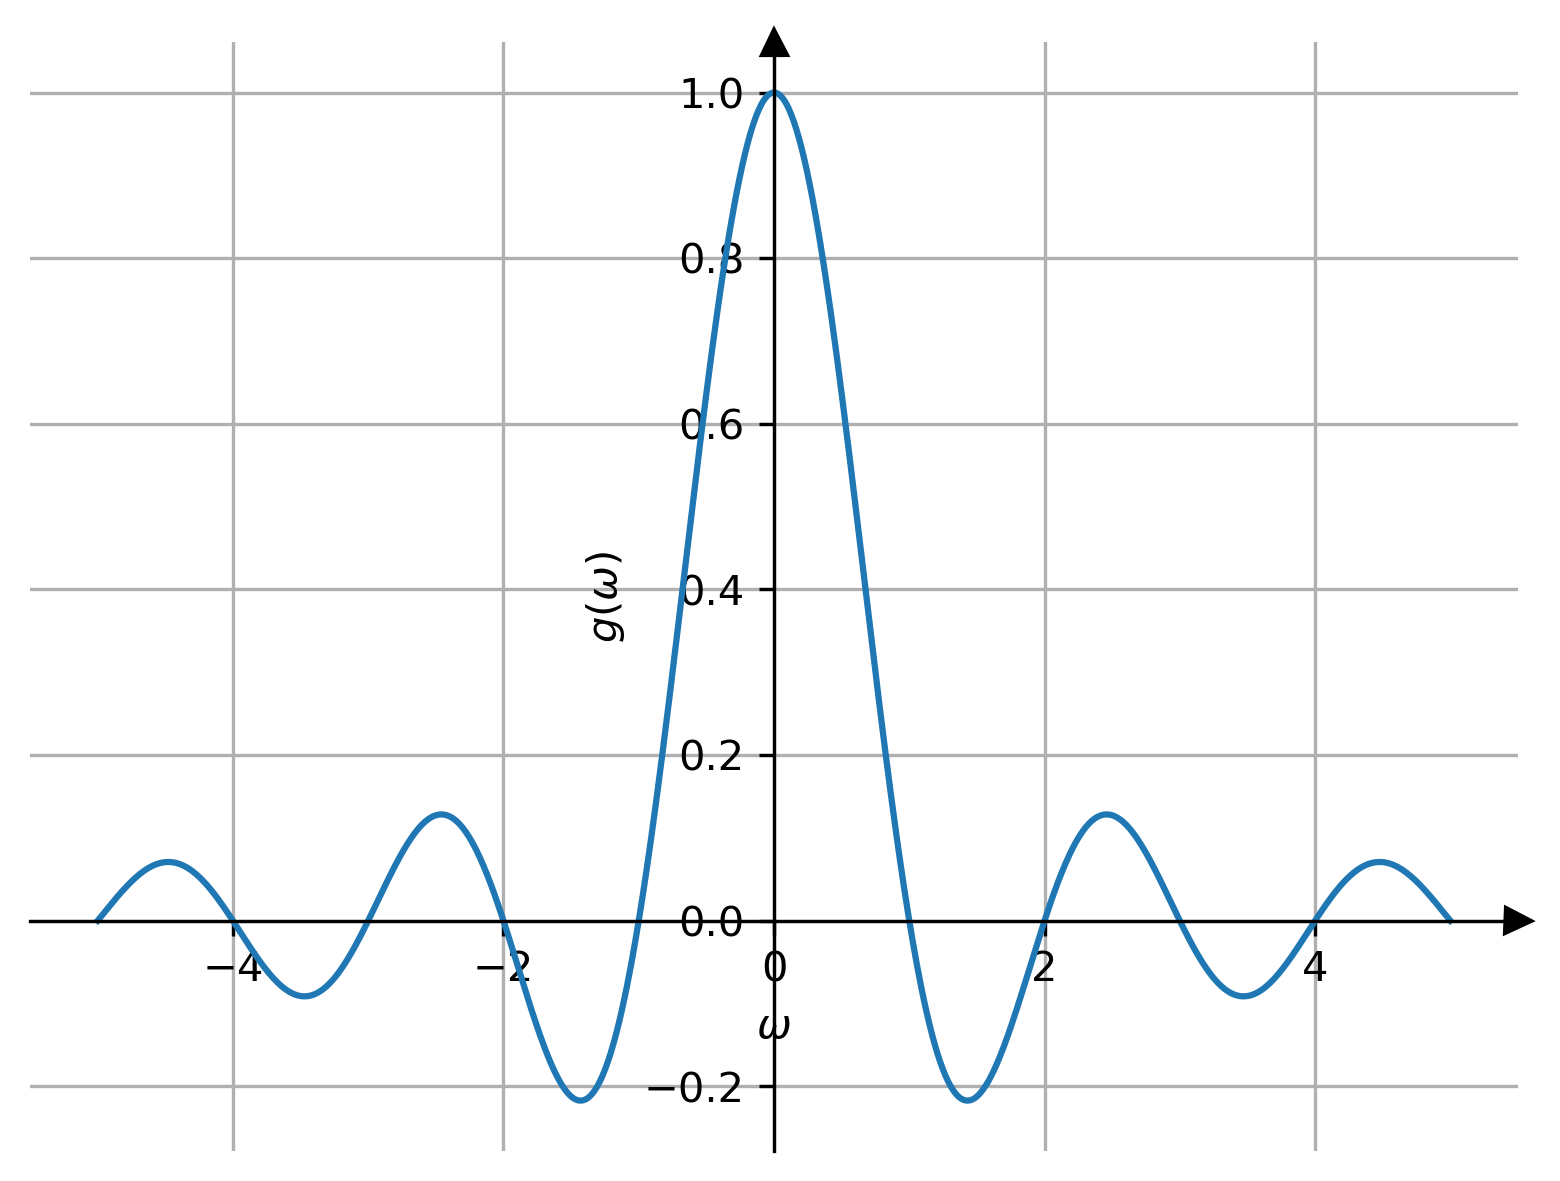

In [10]:
from scipy.special import sinc 

wvals = np.linspace(-5,5,1000)
plt.plot(wvals, sinc(wvals))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$g(\omega)$')
axes()
plt.savefig('sinc.png')

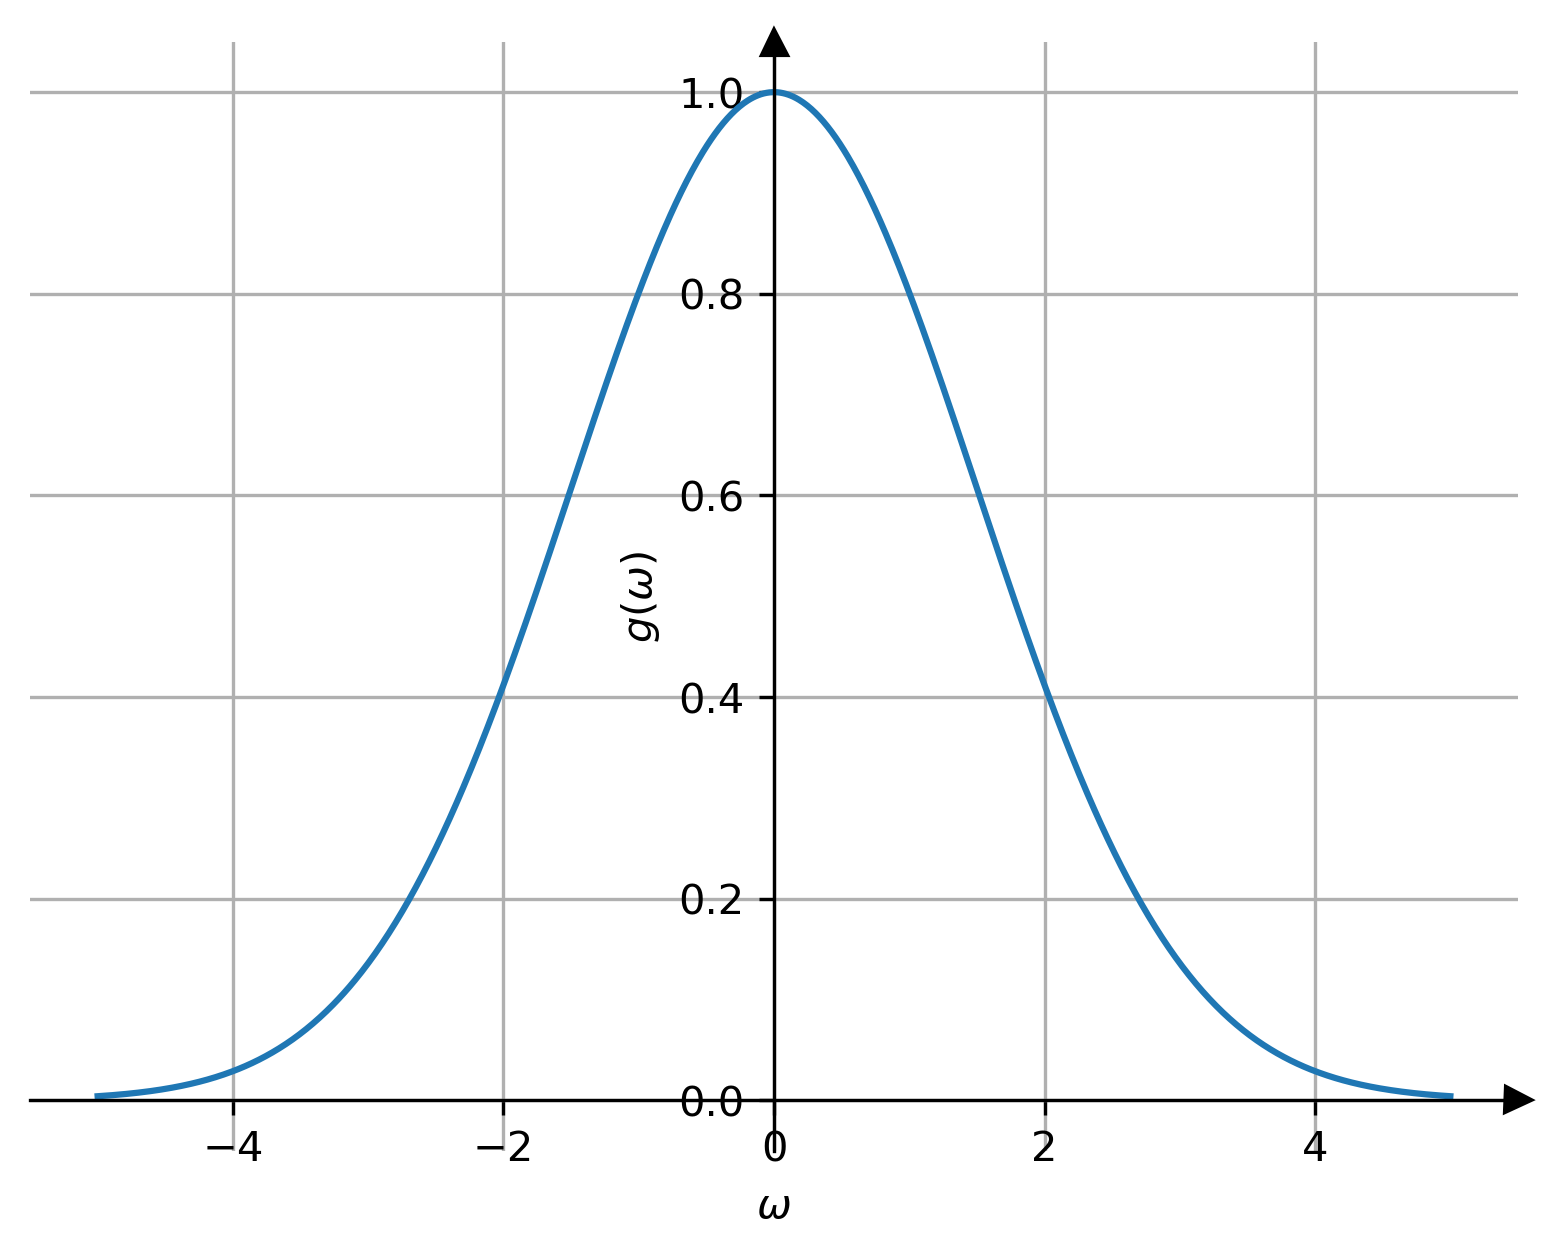

In [12]:
from scipy.signal.windows import gaussian
wvals = np.linspace(-5,5,1000)

plt.plot(wvals, gaussian(1000, std=150))
#plt.plot(gaussian(1000, std=200))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$g(\omega)$')
axes()
plt.savefig('gaussian.png')